In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C20_cherry_only_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n55         11.5059 (10.8044, 12.2358) (10.7876, 12.2163)  1.4287 (Jnode 106)\n',
 't_n56         11.4086 (10.7265, 12.0950) (10.7466, 12.1129)  1.3663 (Jnode 105)\n',
 't_n57         10.7635 (10.1493, 11.3801) (10.1536, 11.3822)  1.2286 (Jnode 104)\n',
 't_n58          9.2360 ( 8.7536,  9.7016) ( 8.7594,  9.7050)  0.9456 (Jnode 103)\n',
 't_n59          8.9610 ( 8.4983,  9.4106) ( 8.4979,  9.4089)  0.9109 (Jnode 102)\n',
 't_n60          8.5780 ( 8.1383,  9.0102) ( 8.1509,  9.0209)  0.8700 (Jnode 101)\n',
 't_n61          8.0303 ( 7.6105,  8.4435) ( 7.6163,  8.4478)  0.8315 (Jnode 100)\n',
 't_n62          3.7225 ( 3.3198,  4.1509) ( 3.3203,  4.1511)  0.8308 (Jnode 99)\n',
 't_n63          5.7957 ( 5.4299,  6.1610) ( 5.4243,  6.1532)  0.7289 (Jnode 98)\n',
 't_n64          4.2719 ( 3.9533,  4.6272) ( 3.9352,  4.6052)  0.6700 (Jnode 97)\n',
 't_n65          3.8038 ( 3.5152,  4.1377) ( 3.5013,  4.1203)  0.6190 (Jnode 96)\n',
 't_n66          3.0350 ( 2.7910,  3.3316) ( 2.7785,  3.31

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    if line[3].startswith('('):
        lower_ci_iqtree.append(float(line[3][1:-1]))
    else:
        lower_ci_iqtree.append(float(line[3][1:-1]))
    if line[4].startswith('('):
        upper_ci_iqtree.append(float(line[4][1:-1]))
    else:
        upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))

for line in mu_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_iqtree.append(float(line[1]))
    lower_ci_mu_iqtree.append(float(line[3][:-1]))
    upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n55',
 't_n56',
 't_n57',
 't_n58',
 't_n59',
 't_n60',
 't_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107']

In [6]:
posterior_mean_iqtree

[11.5059,
 11.4086,
 10.7635,
 9.236,
 8.961,
 8.578,
 8.0303,
 3.7225,
 5.7957,
 4.2719,
 3.8038,
 3.035,
 2.1371,
 1.4623,
 0.6368,
 4.4226,
 8.7447,
 8.3521,
 8.0285,
 5.8632,
 5.289,
 5.1275,
 8.5161,
 8.1309,
 7.804,
 7.3463,
 6.7364,
 6.5383,
 5.7697,
 5.2858,
 4.8803,
 3.7211,
 3.4279,
 5.8009,
 4.7261,
 8.3629,
 1.8757,
 8.1233,
 7.6257,
 6.8571,
 6.3694,
 4.7256,
 5.3782,
 6.5639,
 6.3044,
 5.8223,
 4.4539,
 5.6944,
 9.7747,
 7.3127,
 4.6587,
 3.6364,
 7.6668]

In [7]:
lower_ci_iqtree

[2.2358,
 2.095,
 1.3801,
 0.7536,
 0.4983,
 0.1383,
 0.6105,
 0.3198,
 0.4299,
 0.9533,
 0.5152,
 0.791,
 0.9584,
 0.336,
 0.6152,
 0.0549,
 0.2911,
 0.8827,
 0.6246,
 0.4615,
 0.8735,
 0.0459,
 0.0784,
 0.7058,
 0.3897,
 0.9456,
 0.3663,
 0.1684,
 0.4197,
 0.9414,
 0.5433,
 0.4164,
 0.128,
 0.4356,
 0.3632,
 0.9325,
 0.495,
 0.7079,
 0.2367,
 0.4976,
 0.0383,
 0.3848,
 0.0777,
 0.1962,
 0.9383,
 0.4452,
 0.0605,
 0.2471,
 0.2074,
 0.723,
 0.0684,
 0.0704,
 0.8496]

In [8]:
upper_ci_iqtree

[10.7876,
 10.7466,
 10.1536,
 9.7016,
 9.4106,
 9.0102,
 8.4435,
 4.1509,
 6.161,
 4.6272,
 4.1377,
 3.3316,
 2.3498,
 1.6123,
 0.6917,
 4.7869,
 9.1853,
 8.8157,
 8.4244,
 6.2727,
 5.7078,
 5.3367,
 8.9365,
 8.54,
 8.2055,
 7.7325,
 7.0945,
 6.9012,
 6.112,
 5.6126,
 5.2008,
 4.012,
 3.7142,
 6.1655,
 5.085,
 8.7757,
 2.3021,
 8.5174,
 7.987,
 7.1624,
 6.6298,
 5.031,
 5.5234,
 6.9014,
 6.644,
 6.1742,
 4.8344,
 6.1167,
 10.3465,
 7.8981,
 5.2383,
 4.1812,
 8.5034]

In [9]:
file_LG = open("LG_cherry_only_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    if line[3].startswith('('):
        lower_ci_baseml.append(float(line[3][1:-1]))
    else:
         lower_ci_baseml.append(float(line[3][:-1]))
    if line[4].startswith('('):
        upper_ci_baseml.append(float(line[4][1:-1]))
    else:
         upper_ci_baseml.append(float(line[4][:-1]))
        
    
for line in mu_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_baseml.append(float(line[1]))
    lower_ci_mu_baseml.append(float(line[3][:-1]))
    upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

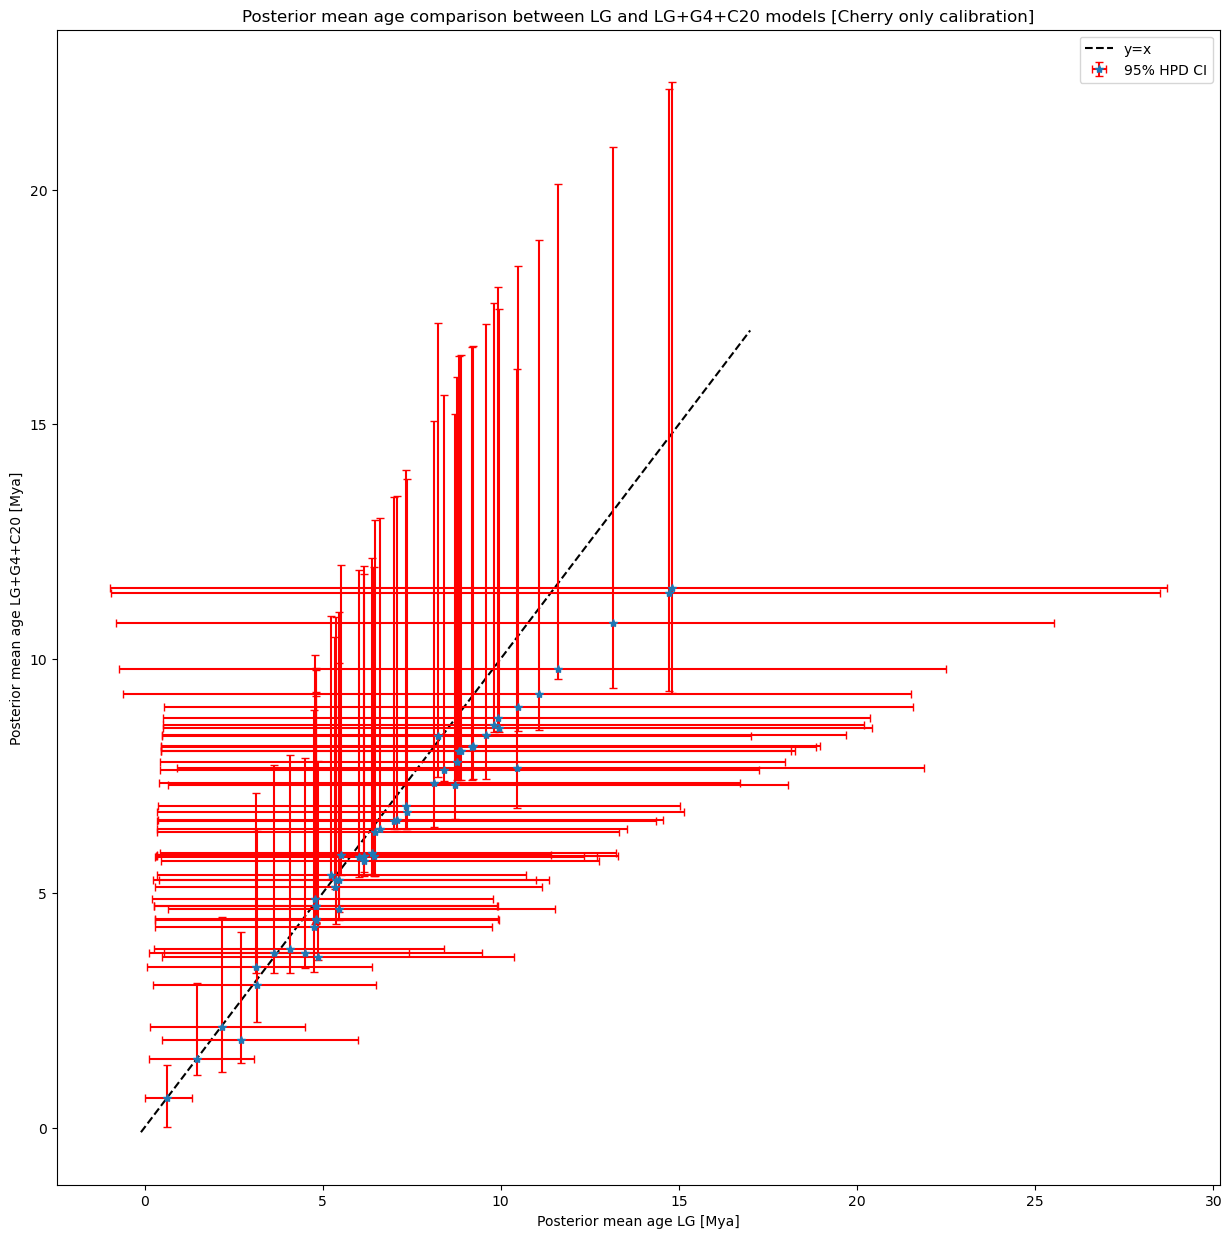

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot([-0.1,17], 
        [-0.1, 17], 
        'k--', label='y=x')
ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
            xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')

# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4+C20 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4+C20 models [Cherry only calibration]')
ax.legend()

# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_C20_co.png')

In [11]:
posterior_mean_baseml

[14.8117,
 14.7114,
 13.1579,
 11.0589,
 10.4949,
 9.8228,
 8.8873,
 4.5045,
 6.4531,
 4.7468,
 4.0766,
 3.1552,
 2.1717,
 1.4798,
 0.6362,
 4.8084,
 9.9083,
 8.2483,
 8.8261,
 6.3902,
 5.4595,
 5.36,
 9.9417,
 9.2289,
 8.7576,
 8.1385,
 7.3734,
 6.9961,
 6.0182,
 5.3633,
 4.7739,
 3.6266,
 3.1194,
 6.1687,
 4.7997,
 9.5877,
 2.7172,
 9.1794,
 8.4084,
 7.3283,
 6.6006,
 4.8023,
 5.2294,
 7.0783,
 6.4674,
 5.5236,
 4.8052,
 6.1483,
 11.5997,
 8.7039,
 5.4564,
 4.882,
 10.4612]

In [12]:
posterior_mean_iqtree

[11.5059,
 11.4086,
 10.7635,
 9.236,
 8.961,
 8.578,
 8.0303,
 3.7225,
 5.7957,
 4.2719,
 3.8038,
 3.035,
 2.1371,
 1.4623,
 0.6368,
 4.4226,
 8.7447,
 8.3521,
 8.0285,
 5.8632,
 5.289,
 5.1275,
 8.5161,
 8.1309,
 7.804,
 7.3463,
 6.7364,
 6.5383,
 5.7697,
 5.2858,
 4.8803,
 3.7211,
 3.4279,
 5.8009,
 4.7261,
 8.3629,
 1.8757,
 8.1233,
 7.6257,
 6.8571,
 6.3694,
 4.7256,
 5.3782,
 6.5639,
 6.3044,
 5.8223,
 4.4539,
 5.6944,
 9.7747,
 7.3127,
 4.6587,
 3.6364,
 7.6668]

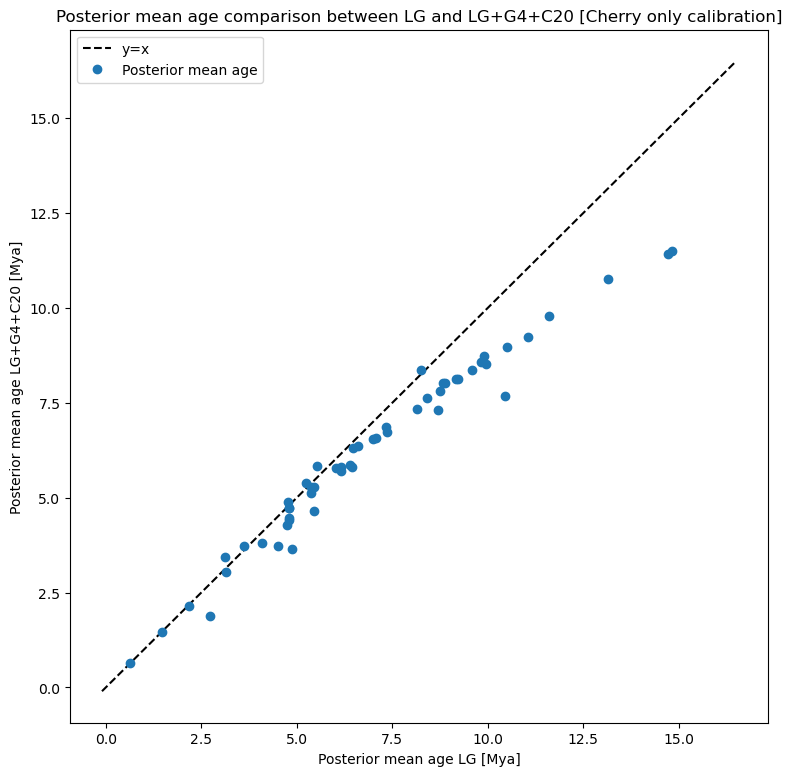

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,16.5], 
        [-0.1, 16.5], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4+C20 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4+C20 [Cherry only calibration]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_C20_co_scatter.png')

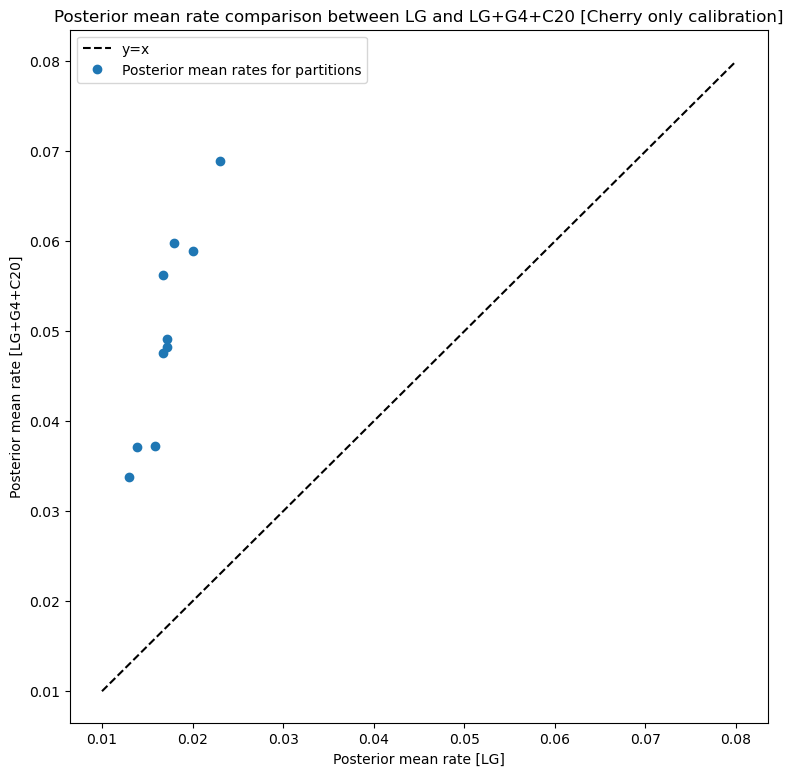

In [16]:
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([0.01,0.08], 
        [0.01, 0.08], 
        'k--', label='y=x')
ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
 
# Labels and title
ax.set_xlabel('Posterior mean rate [LG]')
ax.set_ylabel('Posterior mean rate [LG+G4+C20]')
ax.set_title('Posterior mean rate comparison between LG and LG+G4+C20 [Cherry only calibration]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_rate_comparison_LG_G4_C20_co_scatter.png')